In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None) 

In [3]:
df = pd.read_csv('files/world_data_full_apply_nulos.csv', index_col=0)
df

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,NaN,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

- Lo más común es una tasa de 2, seguida por 1, a medida que crece el número baja el conteo

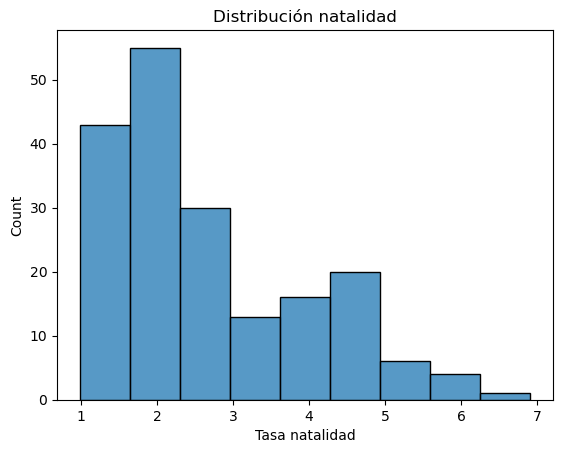

In [5]:
sns.histplot(x = 'fertility_rate', data = df)
plt.xlabel('Tasa natalidad')
plt.title('Distribución natalidad');

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.
- A mayor mortalidad infantil, menor esperanza de vida y viceversa

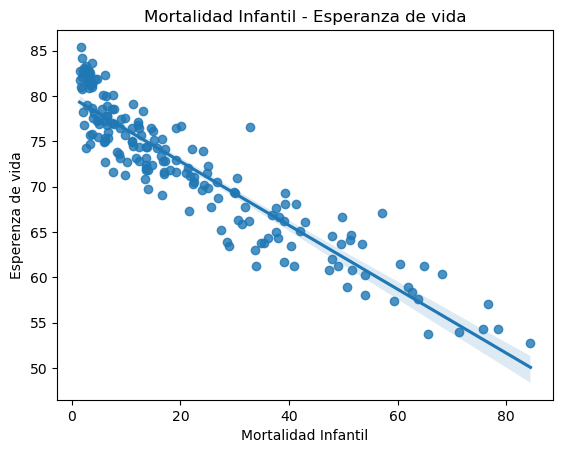

In [6]:
sns.regplot(x = 'infant_mortality', 
y = 'life_expectancy', 
data = df)
plt.xlabel('Mortalidad Infantil')
plt.ylabel('Esperenza de vida')
plt.title('Mortalidad Infantil - Esperanza de vida');

3.¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
- africa con un 27.3% de los países

In [11]:
df_continent = df.groupby('continent')["country"].count().reset_index()

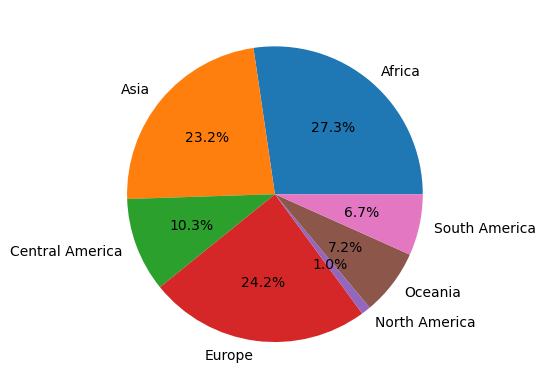

In [12]:
plt.pie("country", labels= "continent",data = df_continent, autopct=  '%1.1f%%');


4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.
- La mediana es 81 y no existen valores atípicos

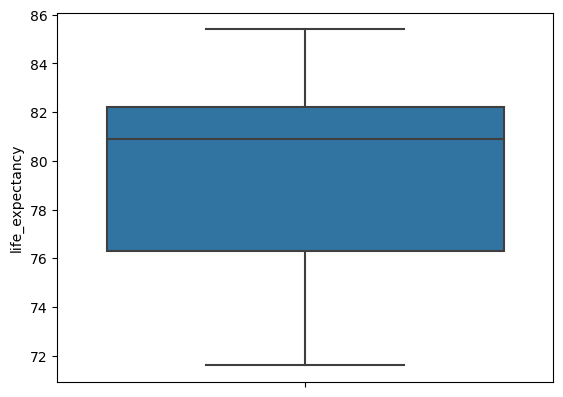

In [15]:
sns.boxplot(y = 'life_expectancy',data = df[df['continent'] == 'Europe']);

5.¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.
- a mayor tasa de natalidad, menor esperanza de vida y mayor tasa de mortalidad infantil.
- sin embargo, la tasa de natalidad no afecta demasiado a ni a la densidad de poblacion, ni a la densidad de poblacion urbana

Text(0, 0.5, 'Populación urbana')

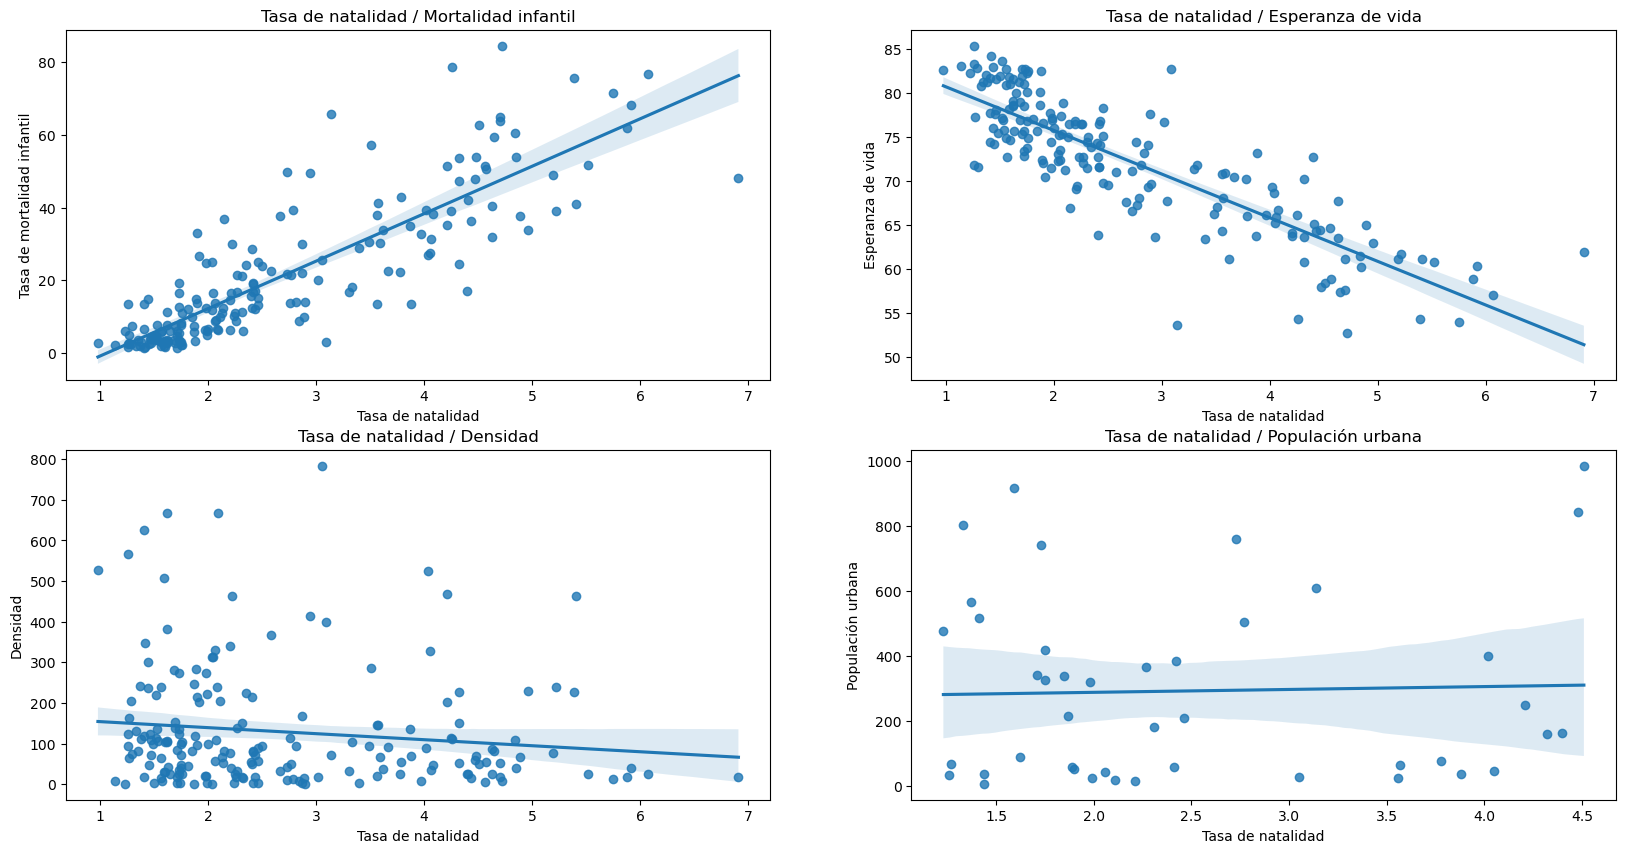

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20,10));

sns.regplot(x = "fertility_rate", y = "infant_mortality", data = df, ax= axes[0,0])
axes[0][0].set_title('Tasa de natalidad / Mortalidad infantil')
axes[0][0].set_xlabel('Tasa de natalidad')
axes[0][0].set_ylabel('Tasa de mortalidad infantil')

sns.regplot(x = "fertility_rate", y = "life_expectancy", data = df, ax= axes[0,1])
axes[0][1].set_title('Tasa de natalidad / Esperanza de vida')
axes[0][1].set_xlabel('Tasa de natalidad')
axes[0][1].set_ylabel('Esperanza de vida')

sns.regplot(x = "fertility_rate", y = 'density', data = df, ax= axes[1,0])
axes[1][0].set_title('Tasa de natalidad / Densidad')
axes[1][0].set_xlabel('Tasa de natalidad')
axes[1][0].set_ylabel('Densidad')

sns.regplot(x = "fertility_rate", y = "urban_population", data = df, ax= axes[1,1]);
axes[1][1].set_title('Tasa de natalidad / Populación urbana')
axes[1][1].set_xlabel('Tasa de natalidad')
axes[1][1].set_ylabel('Populación urbana')

6. ¿Cuáles son los 10 países con la mayor área forestal?

In [9]:

df_forestal_top10= df[['country', 'forested_area']].sort_values(by='forested_area', ascending = False).head(10)
df_forestal_top10

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


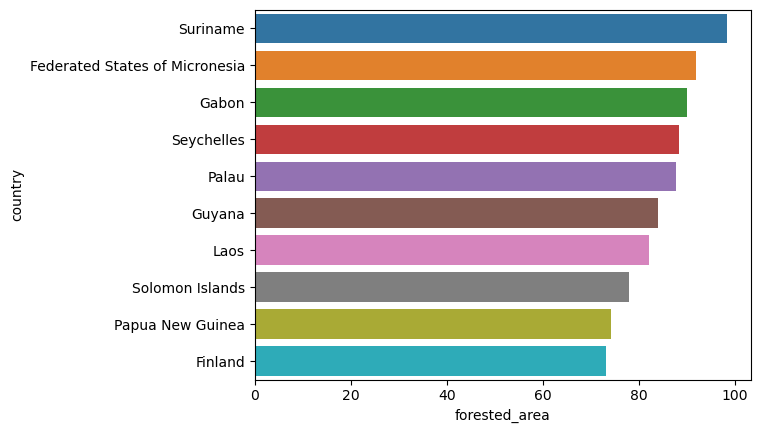

In [10]:
sns.barplot(x = "forested_area", y = "country", data = df_forestal_top10);

7.¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?
-Sí, los valores están muy lejos de ser uniformes entre continentes, siendo africa la más alta y europa la más alta (llegando a triplicar la primera a la última)

In [11]:
df_continent_nat = df.groupby('continent')['birth_rate'].mean().reset_index()
df_continent_nat

,continent,birth_rate
0,Africa,31.906154
1,Asia,18.811136
2,Central America,16.689000
3,Europe,9.955111
4,North America,10.850000
5,Oceania,23.115833
6,South America,17.033077


<Axes: xlabel='birth_rate', ylabel='continent'>

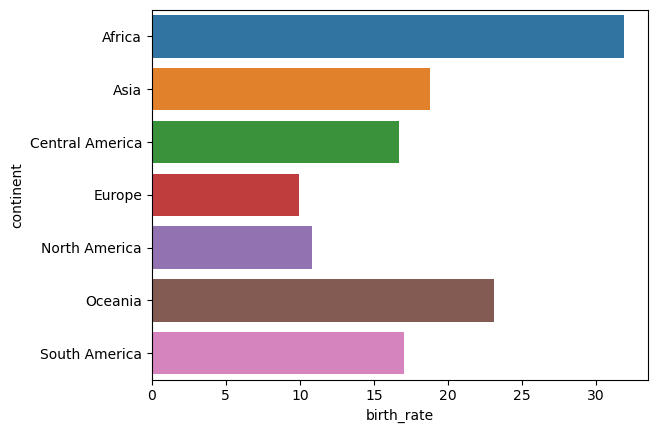

In [12]:
sns.barplot(data =df_continent_nat, x="birth_rate", y="continent")

8.- ¿Cómo se relacionan el cpi y el precio de la gasolina?
Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. 

Ajusta los valores del CPI entre 100 y 300.

-no conseguimos ver una relacion muy clara con scatterplot, parece que entre países con un ipc 'parecido' el precio de la gasolina varia bastante.

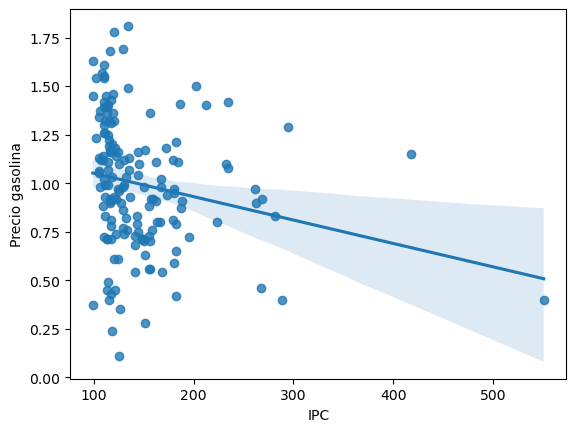

In [13]:
sns.regplot(x = "cpi", y = "gasoline_price", data = df)


plt.xlabel("IPC")
plt.ylabel("Precio gasolina")
plt.xlim = ([100,300]);

9.-Cómo varia la esperanza de vida entre los diferentes países de Oceanía?
Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

- no tiene demasiado sentido la comparativa (o noe stamos haciendo bien el ejercicio), ¿¿parece ser que el idioma oficial de la gran mayoria de paises es el ingles entonces se amontonan los datos ahí??

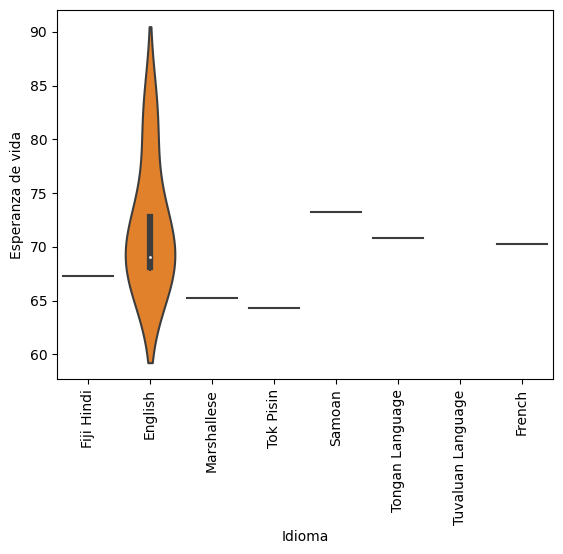

In [18]:
sns.violinplot(x="official_language",y='life_expectancy',data=df[df["continent"]=="Oceania"])

plt.xlabel("Idioma")
plt.xticks(rotation = 90)
plt.ylabel("Esperanza de vida")
plt.xlim = ([100,300]);